## Minimizer and Fittings

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Defenition of Funtions to Load

In [98]:
def linear(x,coeff):
    return x*coeff[0]+coeff[1]
def quadratic(x,coeff):
     return x*x*coeff[0]+x*coeff[1] + coeff[2]

## Loss Functions

In [90]:
def chi2(x,y,coeff):
    return np.sum(np.asarray([(y-func(x,coeff))*(y-func(x,coeff))]))/np.shape(x)[0]**2

## Gradient Functions

#### Numerical Gradient for a funtion

In [154]:
def get_grad(f,loss_f,x,y,coeff,d_coeff):
    grads=[]
    L0 = loss_f(x,y,coeff)
#     print(f"{L0=}")
    for ci in range(len(coeff)):
        coeff_=[i for i in coeff]
        coeff_[ci] += d_coeff[ci]
        L=loss_f(x,y,coeff_)
        grads.append((L-L0)/d_coeff[ci])
    return np.array(grads)

## Minimization Loop

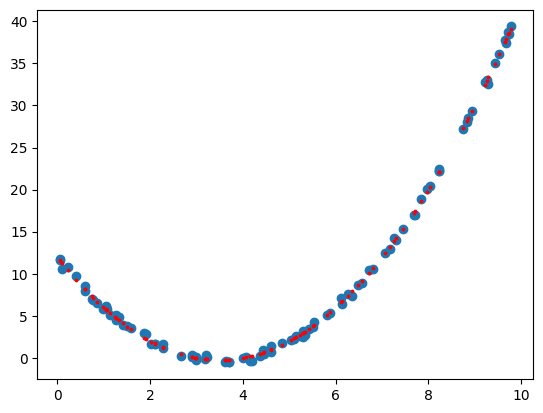

In [195]:
N=100
coeff_true=[1.0,-7.0,12.0]
X=np.random.uniform(size=N)*10
Y=coeff_true[0]*X + coeff_true[1] + np.random.normal(size=N,scale=0.5)
Y=coeff_true[0]*X*X + coeff_true[1]*X + coeff_true[2] + np.random.normal(size=N,scale=0.3)
plt.scatter(X,Y)

func=linear
func=quadratic
plt.scatter(X,func(X,coeff_true),s=3,c='r')

coeff=np.array([2.0,-1.0])
coeff=np.array([0.0,0.0,0.0])

In [196]:

D_COEFF=[0.1,0.1,0.1]

chi2(X,Y,[0.1,0.0,0.0])

get_grad(func,chi2,X,Y,[0.1,0.0,0.0],D_COEFF)

array([-6.48961074, -0.91900486, -0.13340408])

In [197]:
N_ITR=100000
grad_stats={'coeff':[],'loss':[]}
lrate = 0.01
D_COEFF=[0.01,0.01,0.1]
for i in range(N_ITR):
    grad_stats['coeff'].append(coeff)
    grad_stats['loss'].append(chi2(X,Y,coeff))
#     if gradient is None:
#         gradient=np.random.uniform(size=len(coeff))
    gradient=get_grad(
        func,
        chi2,
        X,Y,
        coeff,
        d_coeff=D_COEFF,
    )
    
    coeff = coeff -1*lrate*gradient
#     print(grad_stats['loss'][-1])
coeff_final=coeff

Achived Coeff :  [ 0.81985999 -5.14981236  8.65959684]
True :  [1.0, -7.0, 12.0]


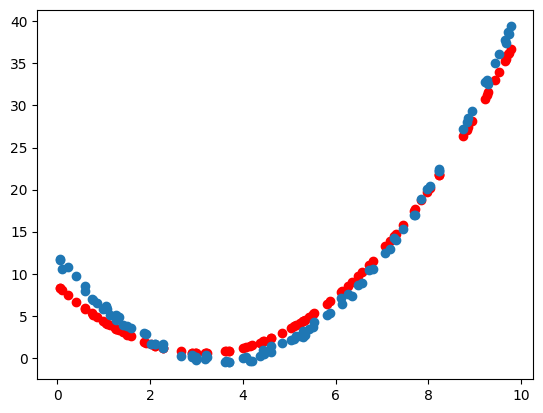

In [198]:
y=func(X,coeff_final)
plt.scatter(X,y,color='r')
plt.scatter(X,Y)
print("Achived Coeff : ",coeff_final)
print("True : ",coeff_true)

Text(0.5, 0, 'N')

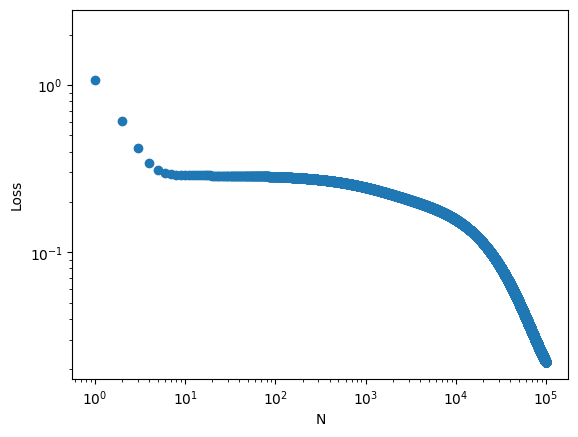

In [202]:
plt.scatter(np.arange(N_ITR),grad_stats['loss'])
plt.semilogy()
plt.semilogx()
plt.ylabel('Loss')
plt.xlabel('N')